**3. NLP Pipeline**

**- Sentiment Analysis and prediction using K Nearest Neighbor**


In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from math import sqrt
from collections import Counter
from random import choice
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline



c:\Users\pdhiman\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data

**Data Preprocessing**

In [2]:
# Loading All the tweets 

df = pd.read_csv('data/tweets_final.csv')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,NaN,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [3]:
### Data Cleaning 

# Checking Locations which are NaN
df.location.isna().sum()

7809

In [4]:
### Data Cleaning 

# Replacing NaN location values with Unknown
df['location'] = df['location'].fillna('Unknown')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [5]:
### Data Cleaning 

# Dropping non english tweets.

df.drop(df[(df['language'] != 'en')].index, inplace=True)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [7]:
### Data Cleaning 

# Removing Emojis , URLs, @ , Stopwords etc.

eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

words = set(nltk.corpus.words.words())

eng_stopwords = []
with open('data/stopwords.txt','r') as file:    
      for line in file:         
          for sw in line.split():            
              eng_stopwords.append(sw)

print(len(words))

def ProcessedTweets(text):
    text = text.lower()  #changing tweet text to small letters 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) # Removing @ and links
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text) # removing repeating characters
    punct = str.maketrans('', '', string.punctuation+string.digits) # removing punctuation and numbers
    text = text.translate(punct)
    
    tokens = word_tokenize(text)  # tokenizing words and removing stop words from the tweet text
    filtered_words = [w for w in tokens if w not in eng_stopwords] #check for stopwords, remove them
    filtered_words = [w for w in filtered_words if w not in emoji] #remove emoji

    #also removed the words not in NLTK words dictionary of set(nltk.corpus.words.words())
    filtered_words1 = [w2 for w2 in filtered_words if w2 in words or w2 in {'democrats', 'dem', 'dems'}]
    #check for synonyms using wordnet 
    
    # lemmetizing words
    #lemmatizer = WordNetLemmatizer() 
    #lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    #text = " ".join(lemma_words)
    
    text = " ".join(filtered_words1) #without wordnet and lemmatizing
    return text

235892


In [8]:
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets)

**Sentiment Analysis**

In [9]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive" 

In [11]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sentiments = df['Sentiment'].value_counts()
sentiments

Neutral     8337
Positive    7169
Negative    3180
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x24ec6b1a400>,
 [Text(-1.0999839696622016, -0.0059385592684765955, 'Neutral'),
  Text(0.949509958327149, -0.5553655004027311, 'Positive'),
  Text(0.3876108820444823, 1.0294453866624973, 'Negative')],
 [Text(-0.5999912561793825, -0.003239214146441779, '44.6%'),
  Text(0.5179145227238994, -0.3029266365833078, '38.4%'),
  Text(0.2114241174788085, 0.5615156654522712, '17.0%')])

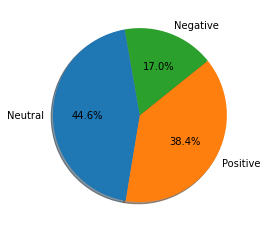

In [12]:
# Pie Chart for Sentiments
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

**Preparing for KNN**

In [13]:
# Spliting tweets intro training and testing sets

training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print("training samples: {training_data.shape[0]}")
print("testing samples: {testing_data.shape[0]}")


training samples: {training_data.shape[0]}
testing samples: {testing_data.shape[0]}


In [11]:
training_unique = (list(set(training_data['Processed_Tweets'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
training_unique_words = len(training_unique)

testing_unique = (list(set(testing_data['Processed_Tweets'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
testing_unique_words = len(testing_unique)

print("Unique words in Training Data: {}".format(training_unique_words))
print("Unique words in Test Data: {}".format(testing_unique_words))

#let's print the count and not the actual words, since sentiments.csv will have 100,000 tweets for over 3 months.
#print("Unique words in Training Data: {}".format(training_unique))
#print("Unique words in Testing Data: {}".format(testing_unique))

Unique words in Training Data: 8160
Unique words in Test Data: 4533


In [12]:
#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [13]:
#Create feature vector containing features count of each word, 
#for all the Processed tweets.

for sentence in training_data['Processed_Tweets']:
    train_featurevec = []
    word = sentence.split()
    for w in training_unique:
        train_featurevec.append(word.count(w))
        #print(train_featurevec)
    train_matrix.append(train_featurevec)
#print(train_matrix)
#Test Data: Extracting features and storing them into the test feature matrix
for sentence in testing_data['Processed_Tweets']:
    test_featurevec = []
    word = sentence.split()
    for w in training_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)

In [14]:
#Calculating distances between every test instance with all the train instances. This returns a 2D distances vector.
dists = cdist(test_matrix,train_matrix,'euclidean') 

In [15]:
#Making an empty column in our test data for predicted labels.
testing_data['Predicted Label'] = ''
dists.shape

(4000, 16001)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
#Initializing lists to be used in plotting later.
acc_list = []
rec_list = []
prec_list = []
f1_list = []

In [18]:
def classifying(train_matrix, test_matrix):
    #training and testing feature vectors
    
    X_train = train_matrix 
    X_test = test_matrix 
    y_train = training_data['Sentiment']
    y_test = testing_data['Sentiment']

    for k in [1,3,5,7]:

        classifier = KNeighborsClassifier(n_neighbors=k) #(n_neighbors=k,algorithm='')
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
        accuracy_score = (round(accuracy_score,2))*100
        acc_list.append(accuracy_score)

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)

        macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
        macro_precision = (round(macro_precision,2))*100
        prec_list.append(macro_precision)

        macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
        macro_recall = (round(macro_recall,2))*100
        rec_list.append(macro_recall)

        macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
        macro_f1 = (round(macro_f1,2))*100
        f1_list.append(macro_f1)

        print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        print(confusion_mat)
        print("\nClassification Report for k = {} is:\n".format(k))
        print(class_report)
        print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
        print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
        print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
        print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))

In [19]:
classifying(train_matrix,test_matrix)



Confusion Matrix for k = 1 is:

[[  68  545   33]
 [   8 1760   22]
 [  16  942  606]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

    Negative       0.74      0.11      0.18       646
     Neutral       0.54      0.98      0.70      1790
    Positive       0.92      0.39      0.54      1564

    accuracy                           0.61      4000
   macro avg       0.73      0.49      0.48      4000
weighted avg       0.72      0.61      0.56      4000

Accuracy Score for k = 1 is: 61.0%
Macroaveraged Recall for k = 1 is: 49.0%
Macroaveraged Precision for k = 1 is: 73.0%
Macroaveraged F1-score for k = 1 is: 48.0%


Confusion Matrix for k = 3 is:

[[  27  601   18]
 [   7 1778    5]
 [  17 1074  473]]

Classification Report for k = 3 is:

              precision    recall  f1-score   support

    Negative       0.53      0.04      0.08       646
     Neutral       0.51      0.99      0.68      1790
    Positive       0.95      0.30      

<function matplotlib.pyplot.show(close=None, block=None)>

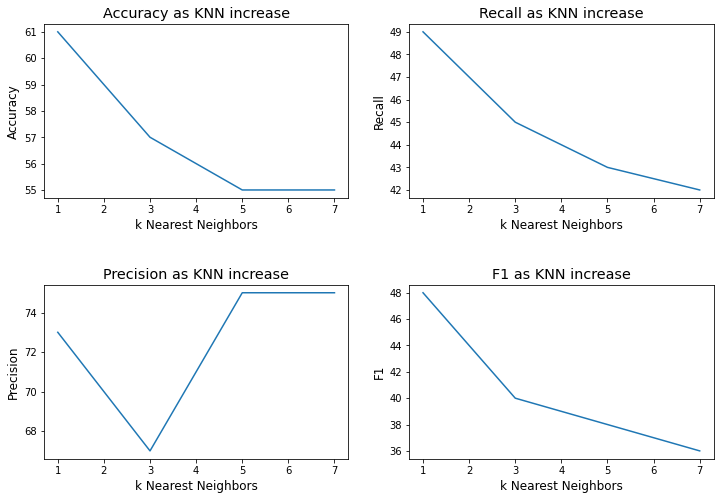

In [20]:
k_ls = [1,3,5,7] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show
